<a href="https://colab.research.google.com/github/a-proenca/LAD/blob/main/LAD_22_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instituto Politécnico de Coimbra
## Instituto Superior de Engenharia de Coimbra
## Mestrado em Engenharia Informática - Laboratório de Análise de Dados
## Elaborado por:

# André Proença - 2016018783

# Bruno Coutinho - 2014009997

#Imports

In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#FUNCOES


In [3]:
def ler_emel():
    emel_filepath = '/content/drive/MyDrive/LAD_2023/EMEL'
    ficheiros = ['EMEL_CONDICIONAMENTOS_TRANSITO_2019.csv','EMEL_CONDICIONAMENTOS_TRANSITO_2020.csv','EMEL_CONDICIONAMENTOS_TRANSITO_2021.csv','EMEL_CONDICIONAMENTOS_TRANSITO_2022.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(emel_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result


In [4]:
def ler_eixos_vodafone_2021():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE EIXOS/PGIL_VODAFONE_EIXOS_2021'
    ficheiros = ['PGIL_VODAFONE_EIXOS_2021_dez.csv','PGIL_VODAFONE_EIXOS_2021_nov.csv','PGIL_VODAFONE_EIXOS_2021_out.csv','PGIL_VODAFONE_EIXOS_2021_set.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

In [5]:
def ler_eixos_vodafone_2022():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE EIXOS/PGIL_VODAFONE_EIXOS_2022'
    ficheiros = ['PGIL_VODAFONE_EIXOS_2022_01.csv','PGIL_VODAFONE_EIXOS_2022_02.csv','PGIL_VODAFONE_EIXOS_2022_03.csv','PGIL_VODAFONE_EIXOS_2022_04.csv','PGIL_VODAFONE_EIXOS_2022_05.csv','PGIL_VODAFONE_EIXOS_2022_06.csv','PGIL_VODAFONE_EIXOS_2022_07.csv','PGIL_VODAFONE_EIXOS_2022_08.csv','PGIL_VODAFONE_EIXOS_2022_09.csv','PGIL_VODAFONE_EIXOS_2022_10.csv','PGIL_VODAFONE_EIXOS_2022_11.csv','PGIL_VODAFONE_EIXOS_2022_12.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

In [6]:
def ler_eixos_vodafone_2023():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE EIXOS/PGIL_VODAFONE_EIXOS_2023'
    ficheiros = ['PgilVodafone_Eixos_012023.csv','PgilVodafone_Eixos_022023.csv','PgilVodafone_Eixos_032023.csv','PgilVodafone_Eixos_042023.csv','PGILVodafonEixos_052023.csv','PGILVodafonEixos_062023.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

In [7]:
def ler_quadriculas_vodafone_bruto():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE_QUADRICULAS'
    ficheiros = ['VODAFONE_QUADRICULAS_BRUTO_UTF8.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

In [8]:
def ler_grelha_vodafone_janeiro2023():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE GRELHA/PGIL_VODAFONE_GRELHA_2023/Janeiro2023'
    ficheiros = ['PgilVodafoneGrelha_15min_012023_1001_2000.csv', 'PgilVodafoneGrelha_15min_012023_2001_3000.csv', 'PgilVodafoneGrelha_15min_012023_3001_3744.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

In [9]:
def ler_grelha_vodafone_fevereiro2023():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE GRELHA/PGIL_VODAFONE_GRELHA_2023/Fevereiro2023'
    ficheiros = ['PgilVodafoneGrelha_15min_022023_1001_2000.csv', 'PgilVodafoneGrelha_15min_022023_2001_3000.csv', 'PgilVodafoneGrelha_15min_022023_3001_3744.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

In [10]:
def ler_grelha_vodafone_marco2023():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE GRELHA/PGIL_VODAFONE_GRELHA_2023/Março2023'
    ficheiros = ['PgilVodafoneGrelha_15min_032023_1001_1500.csv', 'PgilVodafoneGrelha_15min_032023_1501_2000.csv', 'PgilVodafoneGrelha_15min_032023_2001_2500.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

In [11]:
def ler_grelha_vodafone_abril2023():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE GRELHA/PGIL_VODAFONE_GRELHA_2023/Abril2023'
    ficheiros = ['PgilVodafone_15min_042023_1001_2000.csv', 'PgilVodafone_15min_042023_2001_3000.csv', 'PgilVodafone_15min_042023_3001_3743.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

In [12]:
def ler_grelha_vodafone_maio2023():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE GRELHA/PGIL_VODAFONE_GRELHA_2023/Maio2023'
    ficheiros = ['PgilVodafone_15min_052023_1001_2000.csv', 'PgilVodafone_15min_052023_2001_3000.csv', 'PgilVodafone_15min_052023_3001_3743.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

In [13]:
def ler_grelha_vodafone_junho2023():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE GRELHA/PGIL_VODAFONE_GRELHA_2023/Junho2023'
    ficheiros = ['PGILVodafone_15min_16062023_30062023.csv', 'PgilVodafone_15min_01062023_15062023.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

In [14]:
def plot_outlier_detection(df, column_name):

    # boxplot
    plt.figure(figsize=(10, 6))
    df.boxplot(column=[column_name])
    plt.title(f'Boxplot para Detecção de Outliers em {column_name}')
    plt.ylabel('Valores')
    plt.show()

    # scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df.index, df[column_name])
    plt.title(f'Scatter Plot para Detecção de Outliers em {column_name}')
    plt.xlabel('Índice')
    plt.ylabel('Valores')

    # Calculando o limite superior e inferior para outliers (exemplo: 1.5*IQR)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    plt.hlines([limite_superior, limite_inferior], xmin=df.index.min(), xmax=df.index.max(), colors='r')
    plt.show()


In [15]:
def plot_histogram_with_count(df, x_column):
     # Hist
    sns.histplot(data=df, x=x_column, stat='count')
    plt.title(f'Histograma de Contagem para {x_column}')
    plt.xlabel(x_column)
    plt.ylabel('Contagem')
    plt.show()

In [16]:
def filtrar_horas(df, coluna_datetime):
    """
    Filtra um DataFrame para manter apenas as linhas onde os horários em 'coluna_datetime'
    estão entre 7-10 da manhã e 17-20h.

    Parâmetros:
    df (pandas.DataFrame): DataFrame a ser filtrado.
    coluna_datetime (str): Nome da coluna que contém os dados de data e hora.

    Retorna:
    pandas.DataFrame: DataFrame filtrado.
    """
    # Garantir que a coluna Datetime está no formato correto
    df[coluna_datetime] = pd.to_datetime(df[coluna_datetime])

    # Filtrar para manter as horas entre 7-10 da manhã e 17-20h
    df_filtrado = df[((df[coluna_datetime].dt.hour >= 7) & (df[coluna_datetime].dt.hour < 10)) |
                     ((df[coluna_datetime].dt.hour >= 17) & (df[coluna_datetime].dt.hour < 20))]

    return df_filtrado


In [17]:
data_frame_emel = ler_emel()
data_vodafone_eixos2021 = ler_eixos_vodafone_2021()
data_vodafone_eixos2022 = ler_eixos_vodafone_2022()
data_vodafone_eixos2023 = ler_eixos_vodafone_2023()
data_quadriculas_vodafone_bruto = ler_quadriculas_vodafone_bruto()
data_grelha_vodafone_janeiro2023 = ler_grelha_vodafone_janeiro2023()
data_grelha_vodafone_fevereiro2023 = ler_grelha_vodafone_fevereiro2023()
#data_grelha_vodafone_marco2023 = ler_grelha_vodafone_marco2023()
data_grelha_vodafone_abril2023 = ler_grelha_vodafone_abril2023()
#data_grelha_vodafone_maio2023 = ler_grelha_vodafone_maio2023()
#data_grelha_vodafone_junho2023 = ler_grelha_vodafone_junho2023() #-> este faz com que a sessão do colab crash


In [18]:
print("Shape of EMEL Data: ", data_frame_emel.shape)
print("Shape of Eixos 2021: ", data_vodafone_eixos2021.shape)
print("Shape of Eixos 2022: ", data_vodafone_eixos2022.shape)
print("Shape of Eixos 2023: ", data_vodafone_eixos2023.shape)
print("Shape of Quadriculas: ", data_quadriculas_vodafone_bruto.shape)
print("Shape of Grelhas Janeiro 2023: ", data_grelha_vodafone_janeiro2023.shape)
print("Shape of Grelhas Fevereiro 2023: ", data_grelha_vodafone_fevereiro2023.shape)
#print("Shape of Grelhas Marco 2023: ", data_grelha_vodafone_marco2023.shape)
print("Shape of Grelhas Abril 2023: ", data_grelha_vodafone_abril2023.shape)
#print("Shape of Grelhas Maio 2023: ", data_grelha_vodafone_maio2023.shape)

Shape of EMEL Data:  (59049, 10)
Shape of Eixos 2021:  (326270, 7)
Shape of Eixos 2022:  (443399, 8)
Shape of Eixos 2023:  (523328, 8)
Shape of Quadriculas:  (3743, 14)
Shape of Grelhas Janeiro 2023:  (7109856, 23)
Shape of Grelhas Fevereiro 2023:  (7370441, 23)
Shape of Grelhas Abril 2023:  (7576166, 23)


Remove unecessary data

In [19]:
#Drop ao id_eixo_viario 2022 e 2023
data_vodafone_eixos2022.drop('id_eixo_viario', axis=1, inplace=True)
data_vodafone_eixos2023.drop('id_eixo_viario', axis=1, inplace=True)

In [20]:
data_vodafone_eixos2021_f = filtrar_horas(data_vodafone_eixos2021, 'Datetime')
data_vodafone_eixos2022_f = filtrar_horas(data_vodafone_eixos2022, 'Datetime')
data_vodafone_eixos2023_f = filtrar_horas(data_vodafone_eixos2023, 'Datetime')
data_grelha_vodafone_janeiro2023_f = filtrar_horas(data_grelha_vodafone_janeiro2023, 'Datetime')
data_grelha_vodafone_fevereiro2023_f = filtrar_horas(data_grelha_vodafone_fevereiro2023, 'Datetime')
#PROBLEMA QUE EU DPS RESOLVO
#data_grelha_vodafone_marco2023_f = filtrar_horas(data_grelha_vodafone_marco2023, 'Datetime')
data_grelha_vodafone_abril2023_f = filtrar_horas(data_grelha_vodafone_abril2023, 'Datetime')

In [21]:
# juntar df dos eixos e grelhas
df_eixos = pd.concat([data_vodafone_eixos2021_f,data_vodafone_eixos2022_f,data_vodafone_eixos2023_f])
#nao esquecer de adicionar o março
df_grelhas = pd.concat([data_grelha_vodafone_janeiro2023_f,data_grelha_vodafone_fevereiro2023_f,data_grelha_vodafone_abril2023_f])

In [ ]:
data_quadriculas_vodafone_bruto.describe()

In [27]:
df_eixos

,Eixo,Datetime,extract_year_2,Month,Day,C12,C13,Weekday
135,Marginal,2021-12-01 07:15:00+00:00,2021.0,12.0,1.0,183.869995,251.479996,3
136,A5,2021-12-01 07:20:00+00:00,2021.0,12.0,1.0,545.750000,446.470001,3
137,Ponte Vasco da Gama,2021-12-01 07:20:00+00:00,2021.0,12.0,1.0,0.000000,0.000000,3
138,IC2 (Sacavém),2021-12-01 07:20:00+00:00,2021.0,12.0,1.0,200.639999,179.220001,3
139,Marginal,2021-12-01 07:05:00+00:00,2021.0,12.0,1.0,212.020004,68.449997,3
...,...,...,...,...,...,...,...,...
522938,Ponte 25 Abril,2023-06-30 19:55:00+00:00,2023.0,6.0,30.0,24.240000,16.980000,5
522939,A36 (Túnel do Grilo),2023-06-30 19:55:00+00:00,2023.0,6.0,30.0,20.740000,8.650000,5
522940,IC2 (Sacavém),2023-06-30 19:55:00+00:00,2023.0,6.0,30.0,33.790001,35.500000,5
522941,Ponte Vasco da Gama,2023-06-30 19:55:00+00:00,2023.0,6.0,30.0,57.939999,49.860001,5


Data Analysis

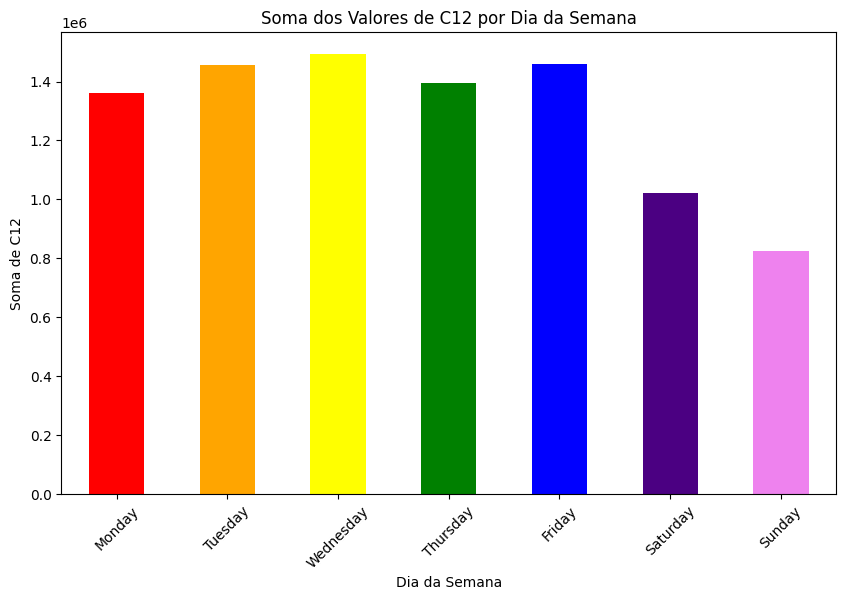

In [36]:
weekday_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
               5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

df_eixos['weekday_name'] = df_eixos['Weekday'].map(weekday_map)

# Agrupando por dia da semana e somando os valores de C12
grouped_data = df_eixos.groupby('weekday_name')['C12'].sum()

# Ordenando os dias da semana
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
grouped_data = grouped_data.reindex(days_order)
grouped_data_mean = grouped_data / 7
# Cores diferentes para cada dia da semana
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

plt.figure(figsize=(10, 6))
grouped_data_mean.plot(kind='bar', color=colors)
plt.title('Soma dos Valores de C12 por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Soma de C12')
plt.xticks(rotation=45)
plt.show()

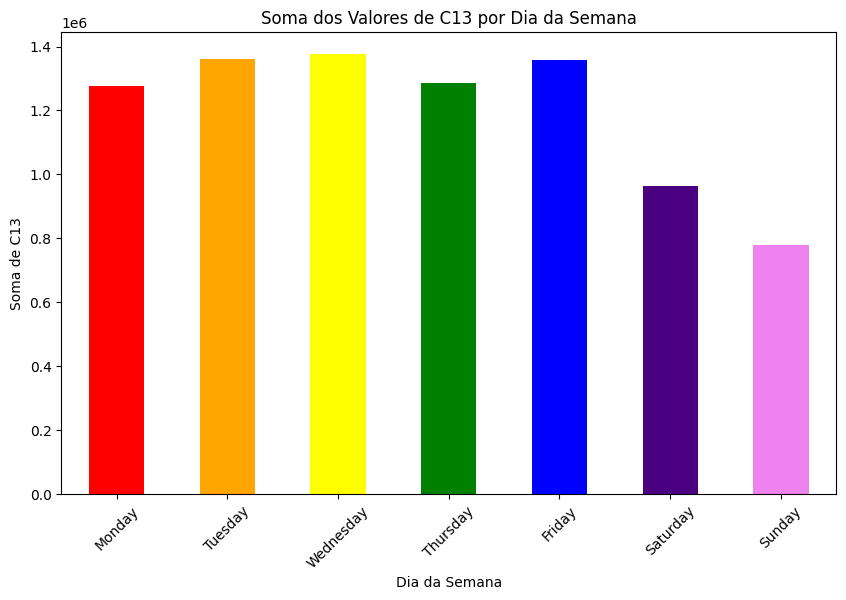

In [35]:
weekday_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
               5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

df_eixos['weekday_name'] = df_eixos['Weekday'].map(weekday_map)

# Agrupando por dia da semana e somando os valores de C13
grouped_data = df_eixos.groupby('weekday_name')['C13'].sum()

# Ordenando os dias da semana
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
grouped_data = grouped_data.reindex(days_order)

grouped_data_mean = grouped_data / 7
# Cores diferentes para cada dia da semana
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

plt.figure(figsize=(10, 6))
grouped_data_mean.plot(kind='bar', color=colors)
plt.title('Soma dos Valores de C13 por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Soma de C13')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plot_outlier_detection(data_vodafone_eixos2023, 'C13')

In [ ]:
plot_histogram_with_count(data_frame_emel, 'impacto')


Feature Engineering e Encoders

In [22]:
df_eixos['Weekday'] = df_eixos['Datetime'].dt.day_name()
df_grelhas['Weekday'] = df_grelhas['Datetime'].dt.day_name()

In [ ]:
##Criar niveis para entradas e saidas
#Vou fazer mais a frente



In [23]:
#Converting Days of weak into Numeric form
df_eixos['Weekday'] = df_eixos['Weekday'].replace({'Monday':1,'Tuesday':2,
                                                          'Wednesday':3,'Thursday':4,
                                                          'Friday':5,'Saturday':6,
                                                          'Sunday':7})
df_grelhas['Weekday'] = df_grelhas['Weekday'].replace({'Monday':1,'Tuesday':2,
                                                          'Wednesday':3,'Thursday':4,
                                                          'Friday':5,'Saturday':6,
                                                          'Sunday':7})
# Renaming the columns
df_eixos.rename(columns={'extract_year': 'Year',
                           'extract_month_3': 'Month',
                           'extract_day_4': 'Day'}, inplace=True)
df_grelhas['Year'] = df_grelhas['Datetime'].dt.year
df_grelhas['Month'] = df_grelhas['Datetime'].dt.month
df_grelhas['Day'] = df_grelhas['Datetime'].dt.day

Correlation HeatMaps

<ipython-input-25-cb6e263a9b14>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_grelhas = df_grelhas.corr()


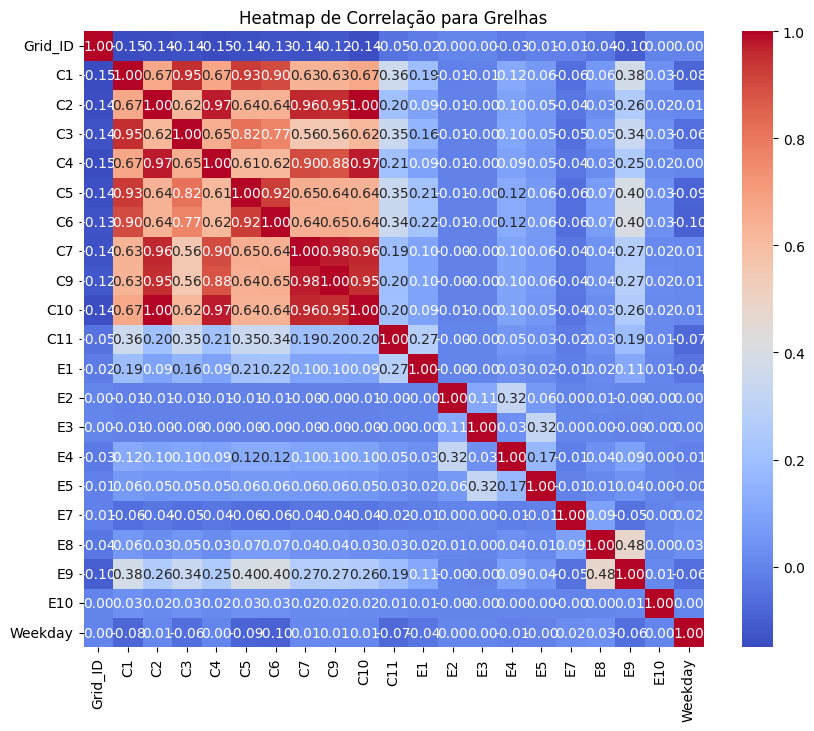

In [25]:
corr_grelhas = df_grelhas.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_grelhas, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap de Correlação para Grelhas')
plt.show()

<ipython-input-26-0a00896b0c0d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_eixos = df_eixos.corr()


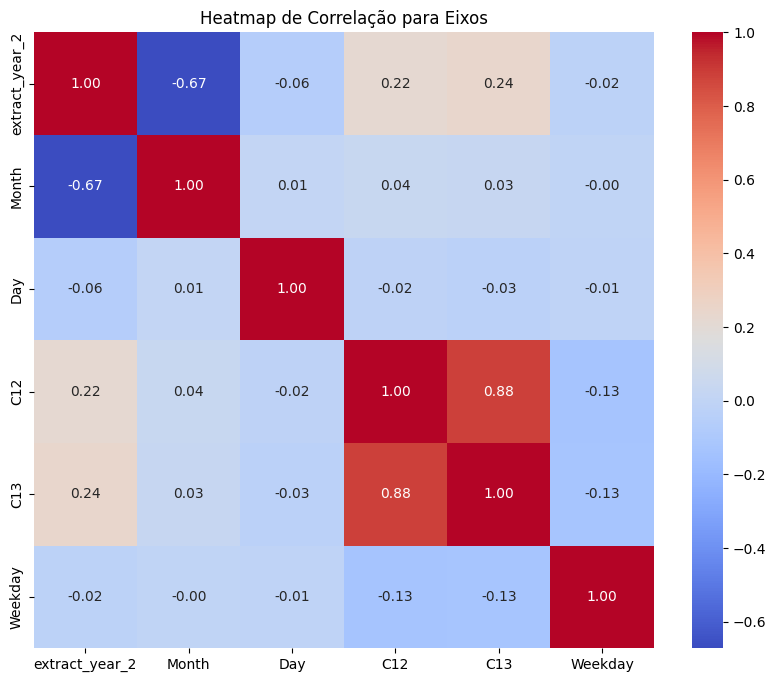

In [26]:
corr_eixos = df_eixos.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_eixos, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap de Correlação para Eixos')
plt.show()

Splitting Data

Feature Scalling